## Problem Statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### 1. Reading and Understanding the Data

In [1]:
#lets import some libraries to read and understand the data
import numpy as np
import pandas as pd
from glob import glob
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
#To load the data lets import the google drive library
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#To locate the path of the file this path library helps to locate
from pathlib import Path
import pathlib

In [4]:
#giving the required params to read and load the data
data_dir_train = pathlib.Path("/content/gdrive/My Drive/Train")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/Test")
base_path = "/content/gdrive/MyDrive/"

In [5]:
#Printing the image count in train and test data
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
# Write your train dataset here
# Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# Make sure you resize your images to the size img_height*img_width, while writting the dataset
train_ds  = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset = 'training',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [10]:
#Image Rescaling, The 1./255 is to convert from uint8 to float32 in range[0, 1]
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data_gen = image_generator.flow_from_directory(directory=data_dir_train,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    target_size=(img_height, img_width),
                                                    classes=list(class_names),
                                                    class_mode='categorical')

Found 2239 images belonging to 9 classes.


### 2. Visualizing the Data

In [11]:
import matplotlib.pyplot as plt
def show_image(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(9):
        ax = plt.subplot(3, 3, n+1)
        plt.imshow(image_batch[n])
        plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
        plt.axis('off')

tf.Tensor([8 4 5 5 3 2 5 0 1 5 7 4 0 4 7 3 3 5 1 5 3 1 1 1 0 1 5 4 2 7 4 1], shape=(32,), dtype=int32)


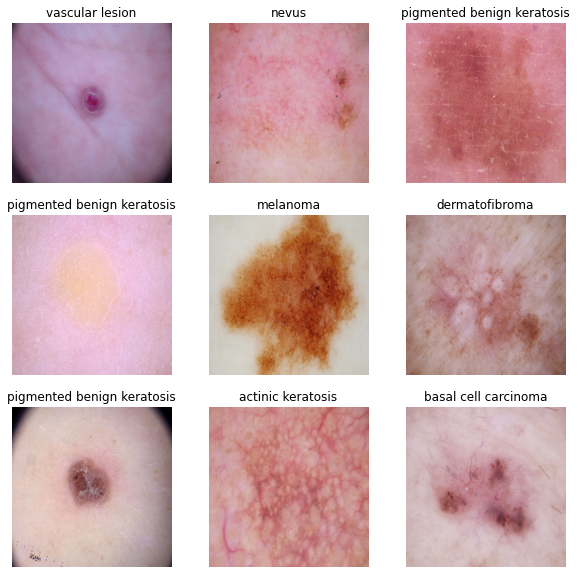

In [12]:
# Lets visualize the Data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  print(labels)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


### 3. Model Building

In [13]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.build

<bound method Sequential.build of <keras.engine.sequential.Sequential object at 0x7f354005a3d0>>

In [16]:
# This Code piece helps to run the code faster in google colab
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [17]:
# Time to run the epochs to get the accuracy of the 1st model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 187s 3s/step - loss: 2.0751 - accuracy: 0.2706 - val_loss: 1.7782 - val_accuracy: 0.3781
Epoch 2/20
56/56 [==============================] - 15s 235ms/step - loss: 1.6456 - accuracy: 0.4202 - val_loss: 1.5160 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 14s 225ms/step - loss: 1.4578 - accuracy: 0.4905 - val_loss: 1.4197 - val_accuracy: 0.5391
Epoch 4/20
56/56 [==============================] - 14s 223ms/step - loss: 1.3832 - accuracy: 0.5307 - val_loss: 1.4454 - val_accuracy: 0.5302
Epoch 5/20
56/56 [==============================] - 14s 227ms/step - loss: 1.2948 - accuracy: 0.5480 - val_loss: 1.4384 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 14s 225ms/step - loss: 1.1885 - accuracy: 0.5910 - val_loss: 1.4458 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 14s 231ms/step - loss: 1.1061 - accuracy: 0.6183 - val_loss: 1.4532 - val_accuracy: 0.5481
E

In [18]:
# Checking of the 1st model sumamry after epoch running
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

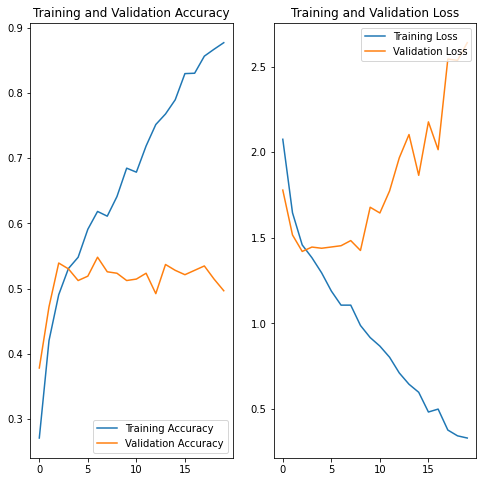

In [19]:
# Plotting the Accuracy Scores in graphical way
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

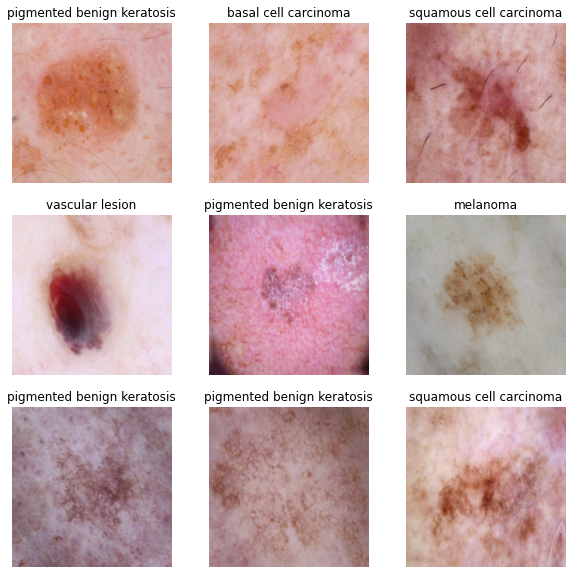

In [21]:
# Visualize how the augmentation strategy works for one instance of training image.
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(images[i], 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [22]:
# Use Dropout layer if there is an evidence of overfitting in your findings
model = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.15),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])


In [23]:
model.compile(optimizer='adam',
              # loss='sparse_categorical_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
# Train the 2nd model for 20 epochs
history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 15s 229ms/step - loss: 2.0570 - accuracy: 0.2489 - val_loss: 1.7463 - val_accuracy: 0.4027
Epoch 2/20
56/56 [==============================] - 14s 226ms/step - loss: 1.6789 - accuracy: 0.3951 - val_loss: 1.6100 - val_accuracy: 0.4407
Epoch 3/20
56/56 [==============================] - 14s 226ms/step - loss: 1.5559 - accuracy: 0.4431 - val_loss: 1.4569 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 14s 228ms/step - loss: 1.4751 - accuracy: 0.4805 - val_loss: 1.5481 - val_accuracy: 0.4385
Epoch 5/20
56/56 [==============================] - 14s 228ms/step - loss: 1.4225 - accuracy: 0.4961 - val_loss: 1.4451 - val_accuracy: 0.5101
Epoch 6/20
56/56 [==============================] - 14s 228ms/step - loss: 1.3249 - accuracy: 0.5290 - val_loss: 1.5112 - val_accuracy: 0.5101
Epoch 7/20
56/56 [==============================] - 14s 223ms/step - loss: 1.3233 - accuracy: 0.5290 - val_loss: 1.4075 - val_accuracy: 0.5235
Epoch 8/20

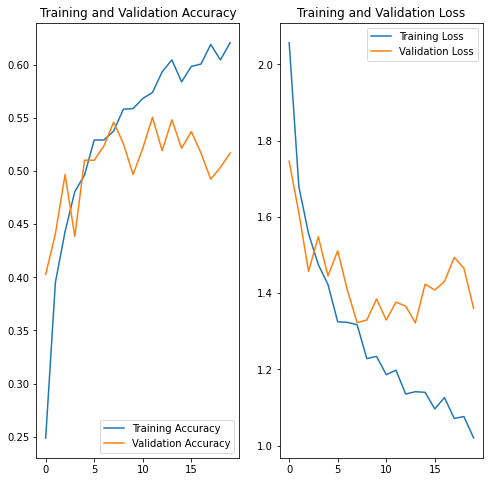

In [25]:
# Visualizing the accuracy of the 2nd model in graphical way
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
total_image_count = len(list(data_dir_train.glob('**/*/*.jpg')))
perc_class = {}
for name in class_names:
    perc_class[name] = round((len(list(data_dir_train.glob('{0}/*.jpg'.format(name)))) / total_image_count)*100,2)
df = pd.DataFrame(list(perc_class.items()), columns=['Class', 'Distribution Percentage'])

df

,Class,Distribution Percentage
0,actinic keratosis,5.09
1,basal cell carcinoma,16.79
2,dermatofibroma,4.24
3,melanoma,19.56
4,nevus,15.94
5,pigmented benign keratosis,20.63
6,seborrheic keratosis,3.44
7,squamous cell carcinoma,8.08
8,vascular lesion,6.21


In [27]:
# Getting the distribution of data for each class
total_count = 0
data_dict = {}
for name in class_names:
    data_dict[name] = len(list(data_dir_train.glob('{0}/*.jpg'.format(name))))
    total_count += len(list(data_dir_train.glob('{0}/*.jpg'.format(name))))

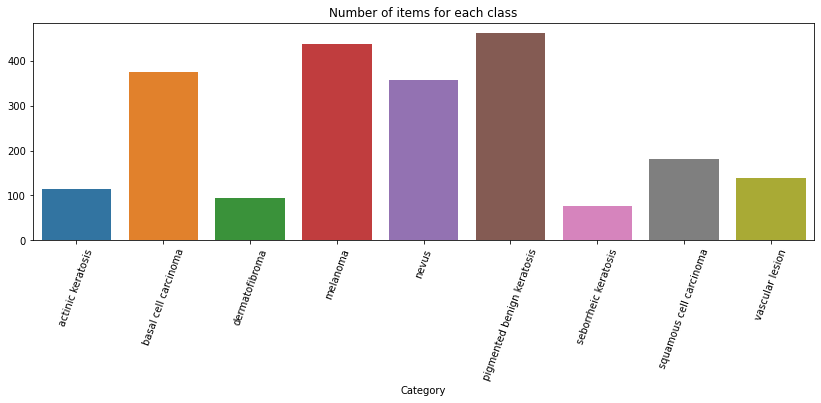

In [28]:
# Plotting the distribution of data using bar plot
f, ax = plt.subplots(1,1, figsize=(14,4))
g = sns.barplot(x=list(data_dict.keys()), y = list(data_dict.values()))
g.set_title("Number of items for each class")
g.set_xlabel("Category")
plt.xticks(rotation=70)
plt.show()

In [29]:
# Installing the Augmentor
!pip install Augmentor

In [30]:
path_to_training_dataset ="/content/gdrive/MyDrive/Train/"
# data_dir_train = pathlib.Path(root_path + '/Train')
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i )
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F34BF2B4410>: 100%|██████████| 500/500 [00:19<00:00, 25.20 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F34BF324690>: 100%|██████████| 500/500 [00:20<00:00, 23.99 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F34BE7A9B90>: 100%|██████████| 500/500 [00:22<00:00, 22.63 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F34BF320B10>: 100%|██████████| 500/500 [01:43<00:00,  4.82 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F34BF31D3D0>: 100%|██████████| 500/500 [01:37<00:00,  5.11 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F34BE6D5F90>: 100%|██████████| 500/500 [00:18<00:00, 27.28 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F34BE73D610>: 100%|██████████| 500/500 [00:42<00:00, 11.79 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F34BE7C5690>: 100%|██████████| 500/500 [00:18<00:00, 27.52 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F34BE843F10>: 100%|██████████| 500/500 [00:18<00:00, 26.38 Samples/s]


In [31]:
# To get the total number of samples newly added using Augumentor
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)


4500


In [32]:
# Get the list of paths that originally had without Augumentor
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010878.jpg_1b535ed6-6a1e-4c30-804b-e2128f5c6887.jpg',
 '/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011007.jpg_2c9aba80-87b1-400e-a65d-1f400ed94f21.jpg',
 '/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011045.jpg_5ef773ab-e61d-401b-9d20-4e639efa2fc6.jpg',
 '/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011031.jpg_955394dd-2f65-4574-85ad-33a63694c6ea.jpg',
 '/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011163.jpg_39975498-f2fd-47fd-8f54-de015a4f91a6.jpg',
 '/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010993.jpg_ac6684e2-1f47-4d86-a4d4-53092890b1f4.jpg',
 '/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISI

In [33]:
# Get the class names for each paths of original data
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [34]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [35]:
df1 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
len(df1)

4500

In [36]:
# Create a dataframe using newly added data using Augumentor
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# Merge orginal data with newly added data
new_df = df1.append(df2)

In [37]:
# Get the list of paths that new added using Augumentor
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010878.jpg_1b535ed6-6a1e-4c30-804b-e2128f5c6887.jpg',
 '/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011007.jpg_2c9aba80-87b1-400e-a65d-1f400ed94f21.jpg',
 '/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011045.jpg_5ef773ab-e61d-401b-9d20-4e639efa2fc6.jpg',
 '/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011031.jpg_955394dd-2f65-4574-85ad-33a63694c6ea.jpg',
 '/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011163.jpg_39975498-f2fd-47fd-8f54-de015a4f91a6.jpg',
 '/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010993.jpg_ac6684e2-1f47-4d86-a4d4-53092890b1f4.jpg',
 '/content/gdrive/My Drive/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISI

In [38]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df =df2

In [39]:
new_df['Label'].value_counts()

seborrheic keratosis          500
dermatofibroma                500
vascular lesion               500
actinic keratosis             500
melanoma                      500
squamous cell carcinoma       500
nevus                         500
pigmented benign keratosis    500
basal cell carcinoma          500
Name: Label, dtype: int64

In [40]:
batch_size = 32
img_height = 180
img_width = 180

In [41]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset =  'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [42]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### 4. Final Model

In [43]:
model = Sequential([

    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(9, activation='softmax')
])

In [44]:
model.compile(optimizer='adam',
              # loss='sparse_categorical_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
# Building the final model with 30 epochs
epochs = 30
history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 47s 257ms/step - loss: 1.7422 - accuracy: 0.4123 - val_loss: 3.4225 - val_accuracy: 0.1128
Epoch 2/30
169/169 [==============================] - 31s 178ms/step - loss: 1.3355 - accuracy: 0.5119 - val_loss: 2.5059 - val_accuracy: 0.1841
Epoch 3/30
169/169 [==============================] - 32s 186ms/step - loss: 1.2089 - accuracy: 0.5530 - val_loss: 1.8656 - val_accuracy: 0.4076
Epoch 4/30
169/169 [==============================] - 31s 176ms/step - loss: 1.0958 - accuracy: 0.5925 - val_loss: 1.4068 - val_accuracy: 0.4833
Epoch 5/30
169/169 [==============================] - 31s 175ms/step - loss: 1.0170 - accuracy: 0.6248 - val_loss: 2.7642 - val_accuracy: 0.2821
Epoch 6/30
169/169 [==============================] - 31s 177ms/step - loss: 1.0242 - accuracy: 0.6157 - val_loss: 2.1312 - val_accuracy: 0.3690
Epoch 7/30
169/169 [==============================] - 30s 174ms/step - loss: 0.9118 - accuracy: 0.6630 - val_loss: 1.8197 - val_accuracy: 0.3

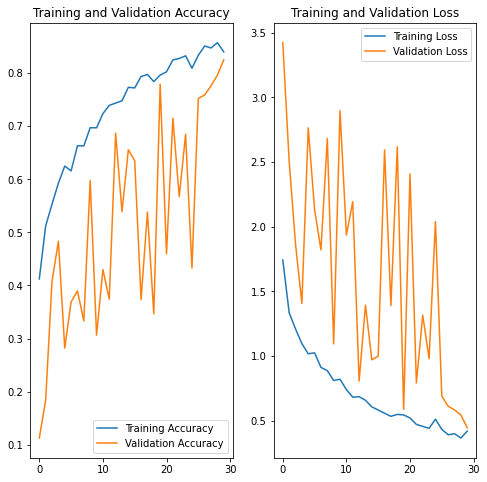

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Conclusions:
1. The final model shows that model is not overfit. This is because, we were able toresolve the class rebalance issue by adding more samples of images using Augumentor.
2. The model is able to predict well by using multiple layers of Convolution 2D (Upto 256).
3. The training accuracy has improved with a value of 0.8398 whereas validation accuracy is now 0.8248
4. The training loss is reduced to 0.4190 and validation loss is reduced to 0.4448.
5. The model can be further improved by adding more images and by performing with some more epochs in final model.